In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))
X=X/255.0
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))



In [4]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])
model.fit(X,y,batch_size=32,validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - 1727s 77ms/sample - loss: 0.6566 - accuracy: 0.6131 - val_loss: 0.6052 - val_accuracy: 0.6681


In [9]:
model.save('final_model.h5')

In [13]:
# import keras
# from keras.models import load_model
# from keras.utils import CustomObjectScope
# from keras.initializers import glorot_uniform

# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
#         model = load_model('final_model.h5')

In [12]:
# from keras.models import load_model
from tensorflow.keras.models import load_model
model = load_model('final_model.h5')

[[[[103]
   [103]
   [103]
   ...
   [ 70]
   [ 67]
   [ 61]]

  [[107]
   [108]
   [110]
   ...
   [ 67]
   [ 64]
   [ 60]]

  [[120]
   [106]
   [109]
   ...
   [ 64]
   [ 64]
   [ 60]]

  ...

  [[130]
   [132]
   [132]
   ...
   [220]
   [229]
   [230]]

  [[210]
   [213]
   [212]
   ...
   [219]
   [226]
   [225]]

  [[238]
   [238]
   [239]
   ...
   [203]
   [207]
   [206]]]]
[[[[103.]
   [103.]
   [103.]
   ...
   [ 70.]
   [ 67.]
   [ 61.]]

  [[107.]
   [108.]
   [110.]
   ...
   [ 67.]
   [ 64.]
   [ 60.]]

  [[120.]
   [106.]
   [109.]
   ...
   [ 64.]
   [ 64.]
   [ 60.]]

  ...

  [[130.]
   [132.]
   [132.]
   ...
   [220.]
   [229.]
   [230.]]

  [[210.]
   [213.]
   [212.]
   ...
   [219.]
   [226.]
   [225.]]

  [[238.]
   [238.]
   [239.]
   ...
   [203.]
   [207.]
   [206.]]]]
Prediction:: Cat


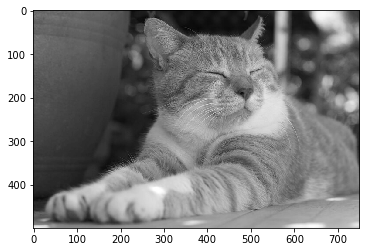

In [31]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
model = load_model('final_model.h5')
img = cv2.imread('K:\\ML\Kaggle\\2. Cat vs Dog\\1.jpg',cv2.IMREAD_GRAYSCALE)
showimg=img
img = cv2.resize(img,(150,150))
img = np.array(img).reshape(1,150,150,1)
img = img.astype('float32')
img = img / 255.0
classes = model.predict_classes(img)
print("Prediction:: Dog" if classes[0][0]=="0" else "Prediction:: Cat")
plt.imshow(showimg,cmap="gray")
plt.show()

In [20]:
# print(img)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1